In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is B
 Volume Serial Number is 1E91-9C51

 Directory of C:\Users\91767\Downloads\ASSIGNMENTS\FORCASTING

08-04-2023  19:48    <DIR>          .
07-04-2023  18:41    <DIR>          ..
01-04-2023  13:07    <DIR>          .ipynb_checkpoints
01-04-2023  11:40             9,559 Airlines+Data.xlsx
01-04-2023  11:40             9,422 CocaCola_Sales_Rawdata.xlsx
08-04-2023  19:44           341,559 FORCASTING ( cococola).ipynb
08-04-2023  19:48           340,971 FORECASTING (airlines).ipynb
               4 File(s)        701,511 bytes
               3 Dir(s)  170,592,051,200 bytes free


In [3]:
ar=pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')
ar=ar.set_index('Month')
ar

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [4]:
import re

In [5]:
ar.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [6]:
# assigning frequency to date time index
ar.index.freq='MS'

In [7]:
ar.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

# EDA

In [8]:
ar.columns

Index(['Passengers'], dtype='object')

In [9]:
ar

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [10]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [11]:
ar.isna().sum()

Passengers    0
dtype: int64

In [12]:
ar.isna().value_counts()

Passengers
False         96
dtype: int64

In [13]:
ar.shape

(96, 1)

In [14]:
ar.dtypes

Passengers    int64
dtype: object

# time series analysis

LINE PLOT

<AxesSubplot:xlabel='Month'>

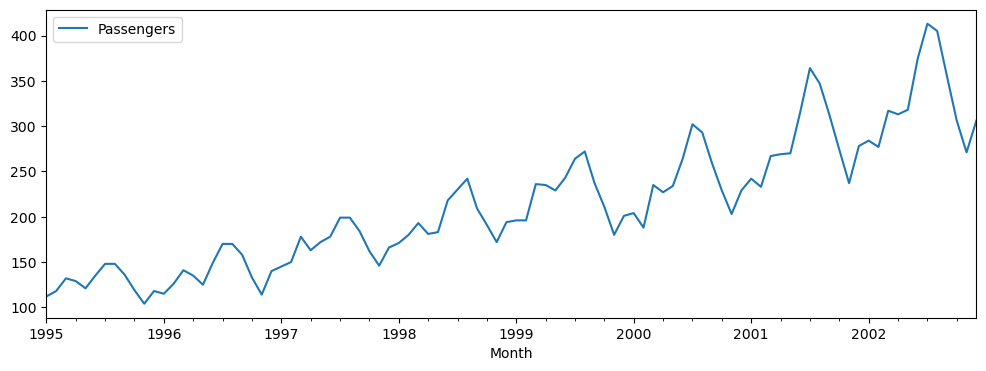

In [15]:
ar.plot(figsize=(12,4))

HISTOGRAM PLOT

<AxesSubplot:>

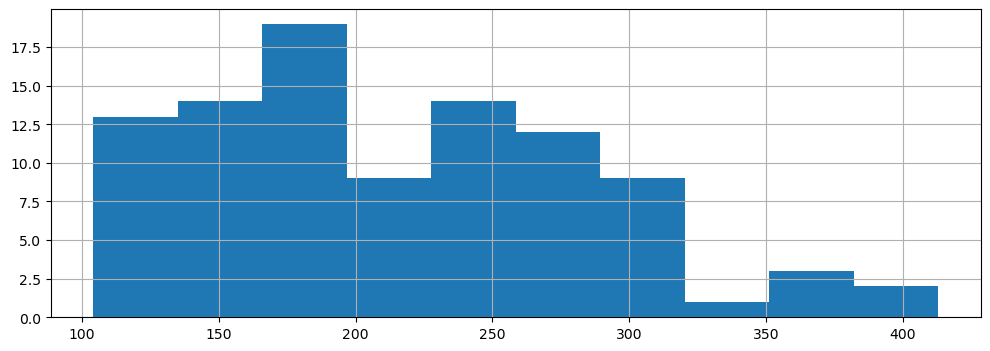

In [16]:
ar['Passengers'].hist(figsize=(12,4))

DENSITY PLOT

<AxesSubplot:ylabel='Density'>

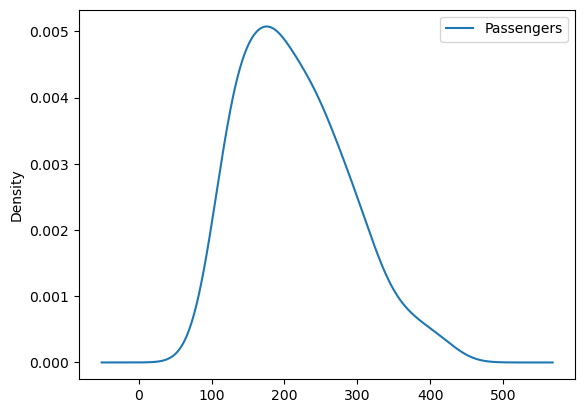

In [17]:
ar.plot(kind='kde')

In [18]:
ar.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Time series decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

Additive seasonal decompose

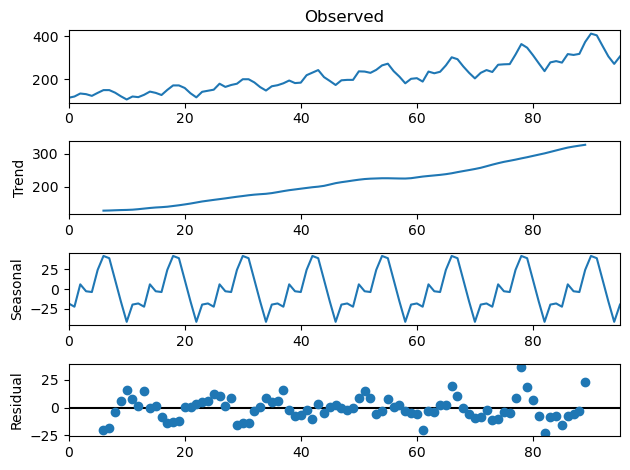

In [20]:
mj=seasonal_decompose((ar.values),model='additive',period=12)
plot=mj.plot()

multiple seasonal decompose

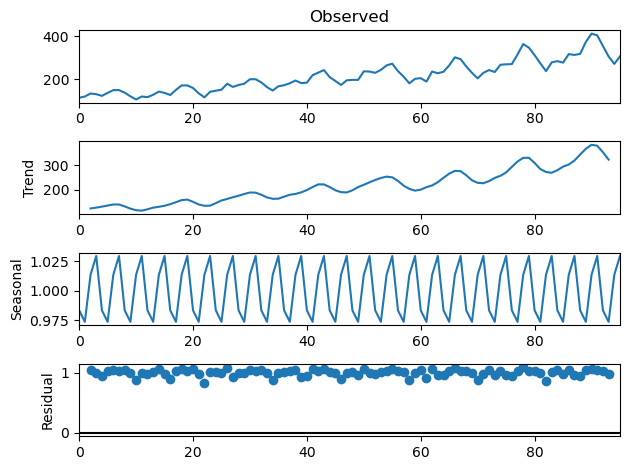

In [21]:
mj1=seasonal_decompose((ar.values),model='multiplicative',period=4)
plot=mj1.plot()

# Forcasting Model Building

In [22]:
len(ar)

96

splitting data into test and train

In [23]:
train=ar[0:72]
test=ar[72:]

In [24]:
test

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


In [25]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-08-01,293
2000-09-01,259
2000-10-01,229


In [26]:
print("length of the test data:",len(test))
print("length of the train data:",len(train))

length of the test data: 24
length of the train data: 72


# Forecasting methods

1) Simple moving average

In [27]:
ar1=ar.copy()

In [28]:
train_len=72

In [29]:
ar1['ma_forecast']=ar1['Passengers'].rolling(12).mean()

In [30]:
ar1['ma_forecast'][train_len:] = ar1['ma_forecast'][train_len-1]

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
## Calculating RMSE and MAPE

rmse_ar1 = mean_squared_error(test['Passengers'],ar1['ma_forecast'][train_len:],squared=False).round(2)
rmse_ar1

82.89

2) Simple Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [34]:
model1=SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
preds=model1.predict(start=test.index[0],end=test.index[-1])

In [35]:
rmse1=mean_squared_error(test['Passengers'],preds,squared=False).round(2)
rmse1

83.65

3) Holt's Method

In [36]:
from statsmodels.tsa.holtwinters import Holt

In [37]:
model_holt=Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt=model_holt.predict(start=test.index[0],end=test.index[-1])

In [38]:
holt_rmse = mean_squared_error(test['Passengers'],pred_holt,squared=False).round(2)
holt_rmse

148.19

4) Holt's exponential smoothing

In [39]:
# a) additive method

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [41]:
add_hes=ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
add_pred=add_hes.predict(start=test.index[0],end=test.index[-1])

In [42]:
add_rmse=mean_squared_error(test['Passengers'],add_pred,squared=False).round(2)
add_rmse

47.57

In [43]:
# b) Multiplicative method

In [44]:
mul_hes=ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()
mul_pred=mul_hes.predict(start=test.index[0],end=test.index[-1])

In [45]:
mul_rmse=mean_squared_error(test['Passengers'],mul_pred,squared=False).round(2)
mul_rmse

34.99

5) ARIMA mode

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

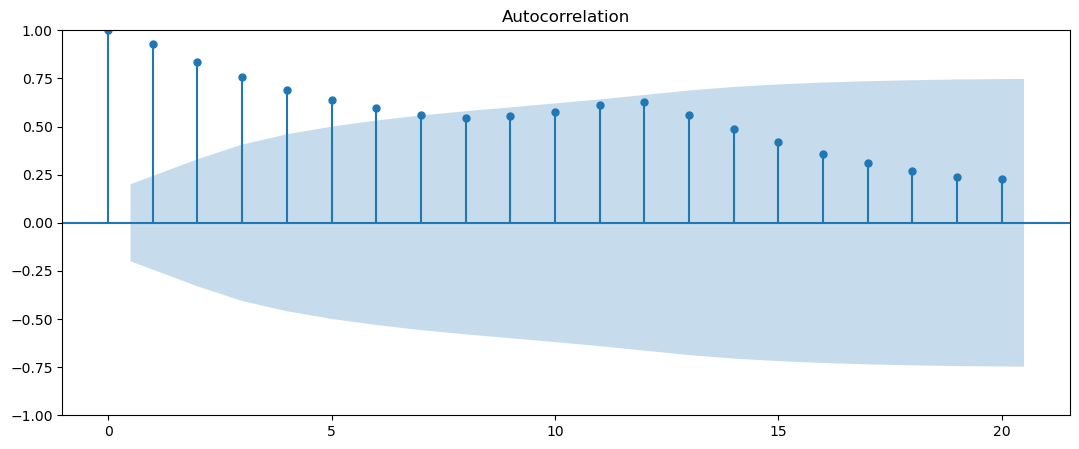

In [47]:
# ACF plot

plt.figure(figsize=(13,5))
plot=plot_acf(ar1['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf

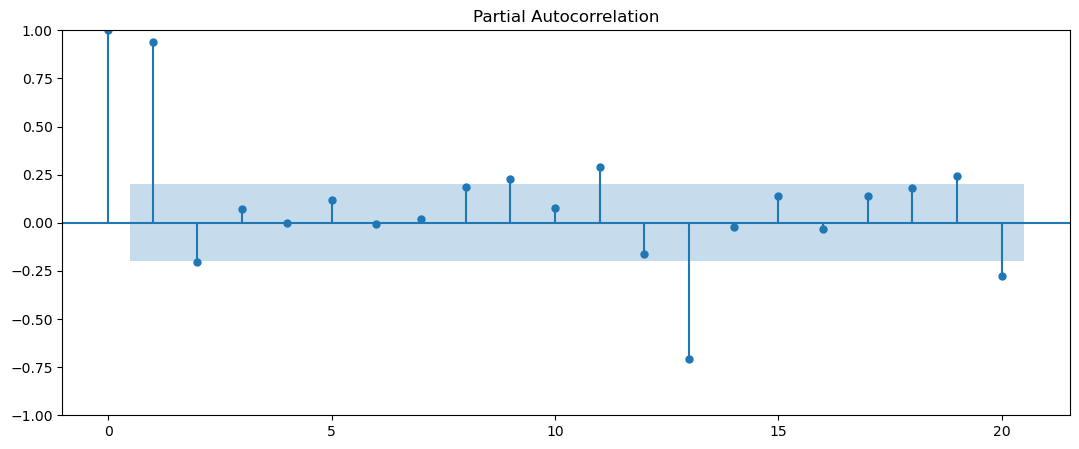

In [49]:
# PCF plot

plt.figure(figsize=(13,5))
plot=plot_pacf(ar1['Passengers'],ax=plt.gca(),lags=20)
plt.show()

# ARIMA

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
arima=ARIMA(train['Passengers'],order=(1,1,1)).fit()
arima_pred=arima.predict(start=test.index[0],end=test.index[-1])

In [52]:
arima_rmse=mean_squared_error(test['Passengers'],arima_pred,squared=False).round(2)
arima_rmse

88.96

In [53]:
final_model=['Simple moving average','Simple exponential smoothing','Holts method','holts additive method','holts Multiplicative method','ARIMA']
final_rmse=[rmse_ar1,rmse1,holt_rmse,add_rmse,mul_rmse,arima_rmse]
ee={'models':final_model,'Rmse':final_rmse}
modelss=pd.DataFrame(ee)
modelss

,models,Rmse
0,Simple moving average,82.89
1,Simple exponential smoothing,83.65
2,Holts method,148.19
3,holts additive method,47.57
4,holts Multiplicative method,34.99
5,ARIMA,88.96


In [54]:
modelss.sort_values(by='Rmse')

,models,Rmse
4,holts Multiplicative method,34.99
3,holts additive method,47.57
0,Simple moving average,82.89
1,Simple exponential smoothing,83.65
5,ARIMA,88.96
2,Holts method,148.19


The " holts Multiplicative method " is the best here, and it also has the lowest rmse of all models.